# Diabetes Diagnosis Prediction:

The objective of the dataset is to diagnostically predict whether a patient has diabetes based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. This dataset contains the following columns:

*Pregnancies - Number of times pregnent.

*Glucose - Glucose level in blood.

*BloodPressure - Diastolic blood pressure(mm Hg)

*SkinThickness - Triceps skin fold thickness(mm)

*Insulin - The insulin level in blood

*BMI - The body mass Index (weight in kg/(height in m)^2)

*DiabetesPedigreeFunction - Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)

*Age - Age(years)

*Outcome - The class variable(0 or 1) where 1 indicates the presence of diabetes and 0 indicates absent.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Reading dataset
dft2 = pd.read_csv('diabetes.csv')
dft2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
dft2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Exploratory Data Analysis

In [6]:
dft2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
dft2.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [10]:
dft2.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [11]:
dft2.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value: Glucose, BloodPressure, SkinThickness, Insulin, BMI. It is better to replace zeros with NAN since after that counting them would be easier and zeros need to be replaced with suitable values.

In [12]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure', 'SkinThickness', 'Insulin','BMI']] = df_copy[['Glucose','BloodPressure', 'SkinThickness', 'Insulin','BMI']].replace(0, np.NaN)

In [13]:
#Showing the count of NaNs
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


## Observations:

*There are 768 records and 9 features in this dataset.

*Each feature is of integer or float data type.

*The mean age is around 33 years.

## Data Visualization

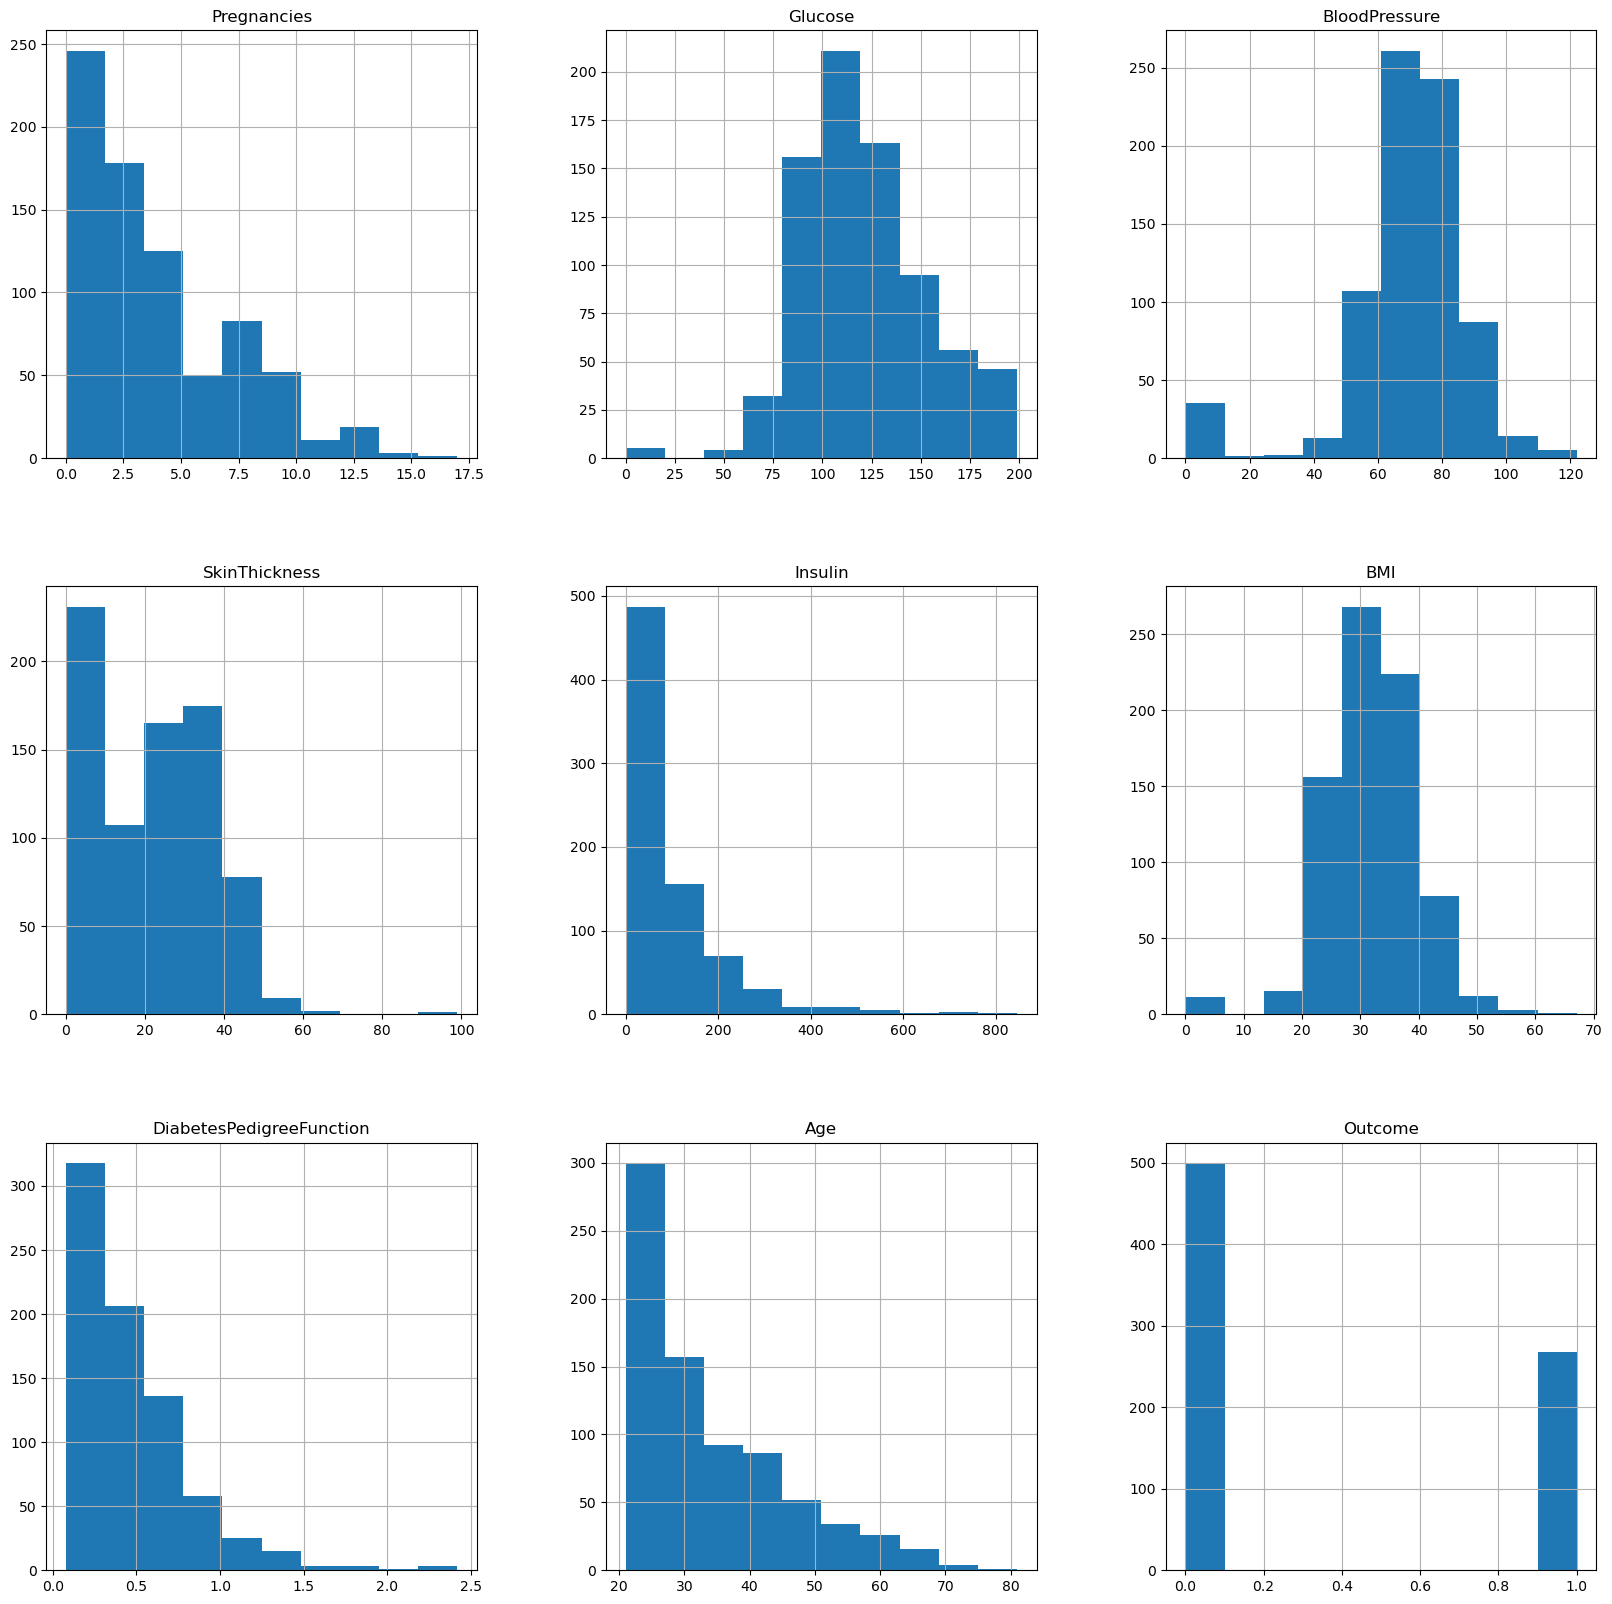

In [14]:
# Data distribution plots
p = dft2.hist(figsize = (20, 20))

In [15]:
# Replacing NaN with mean and median values
df_copy["Glucose"].fillna(df_copy["Glucose"].mean(), inplace = True)
df_copy["BloodPressure"].fillna(df_copy["BloodPressure"].mean(), inplace = True)
df_copy["SkinThickness"].fillna(df_copy["SkinThickness"].median(), inplace = True)
df_copy["Insulin"].fillna(df_copy["Insulin"].median(), inplace = True)
df_copy["BMI"].fillna(df_copy["BMI"].median(), inplace = True)

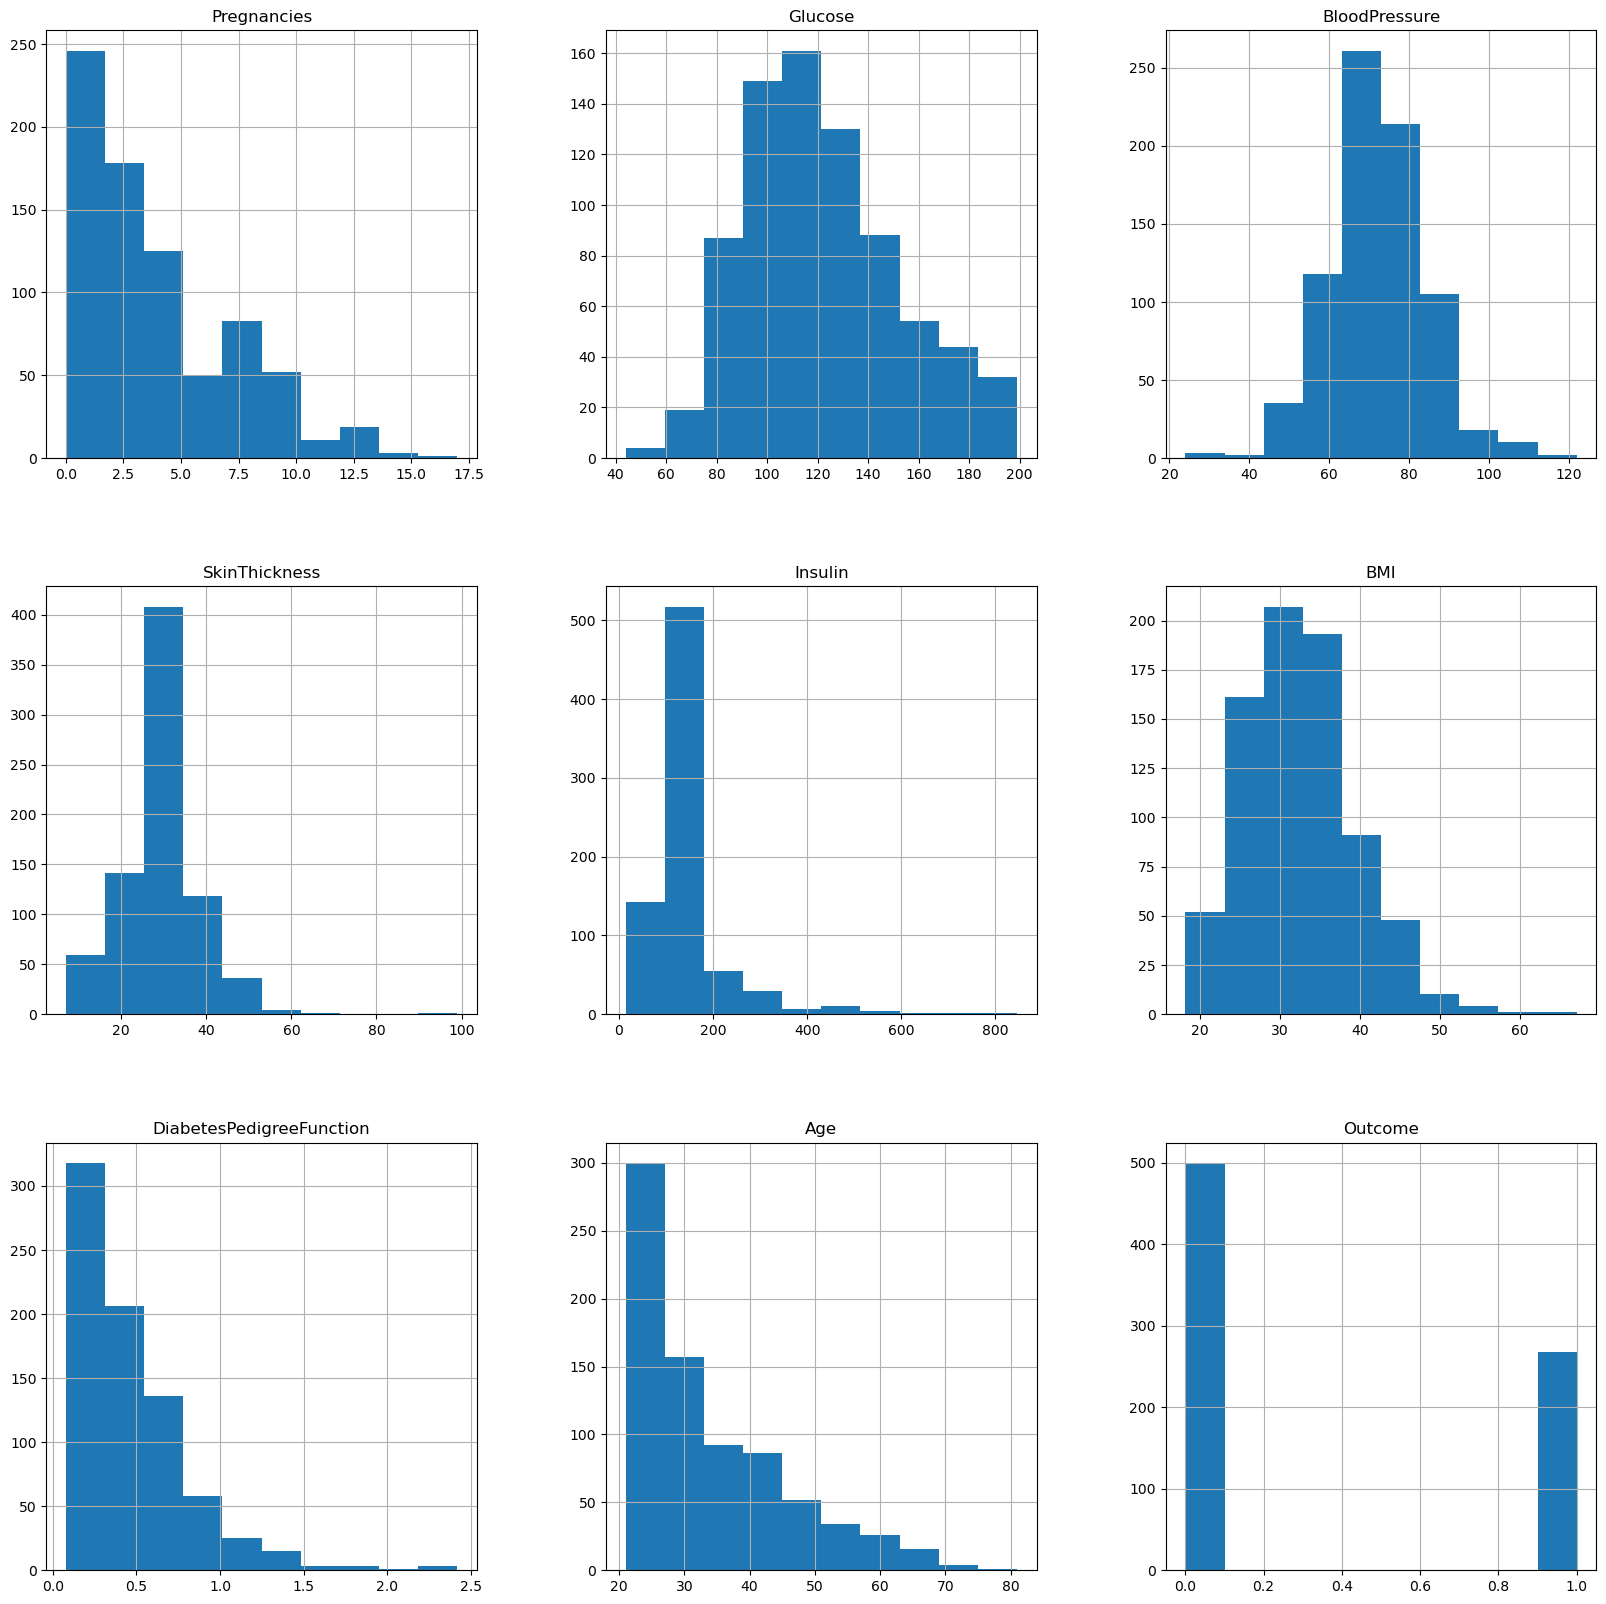

In [16]:
# Plotting the distribution after removing the NAN values
plot = df_copy.hist(figsize = (20,20))

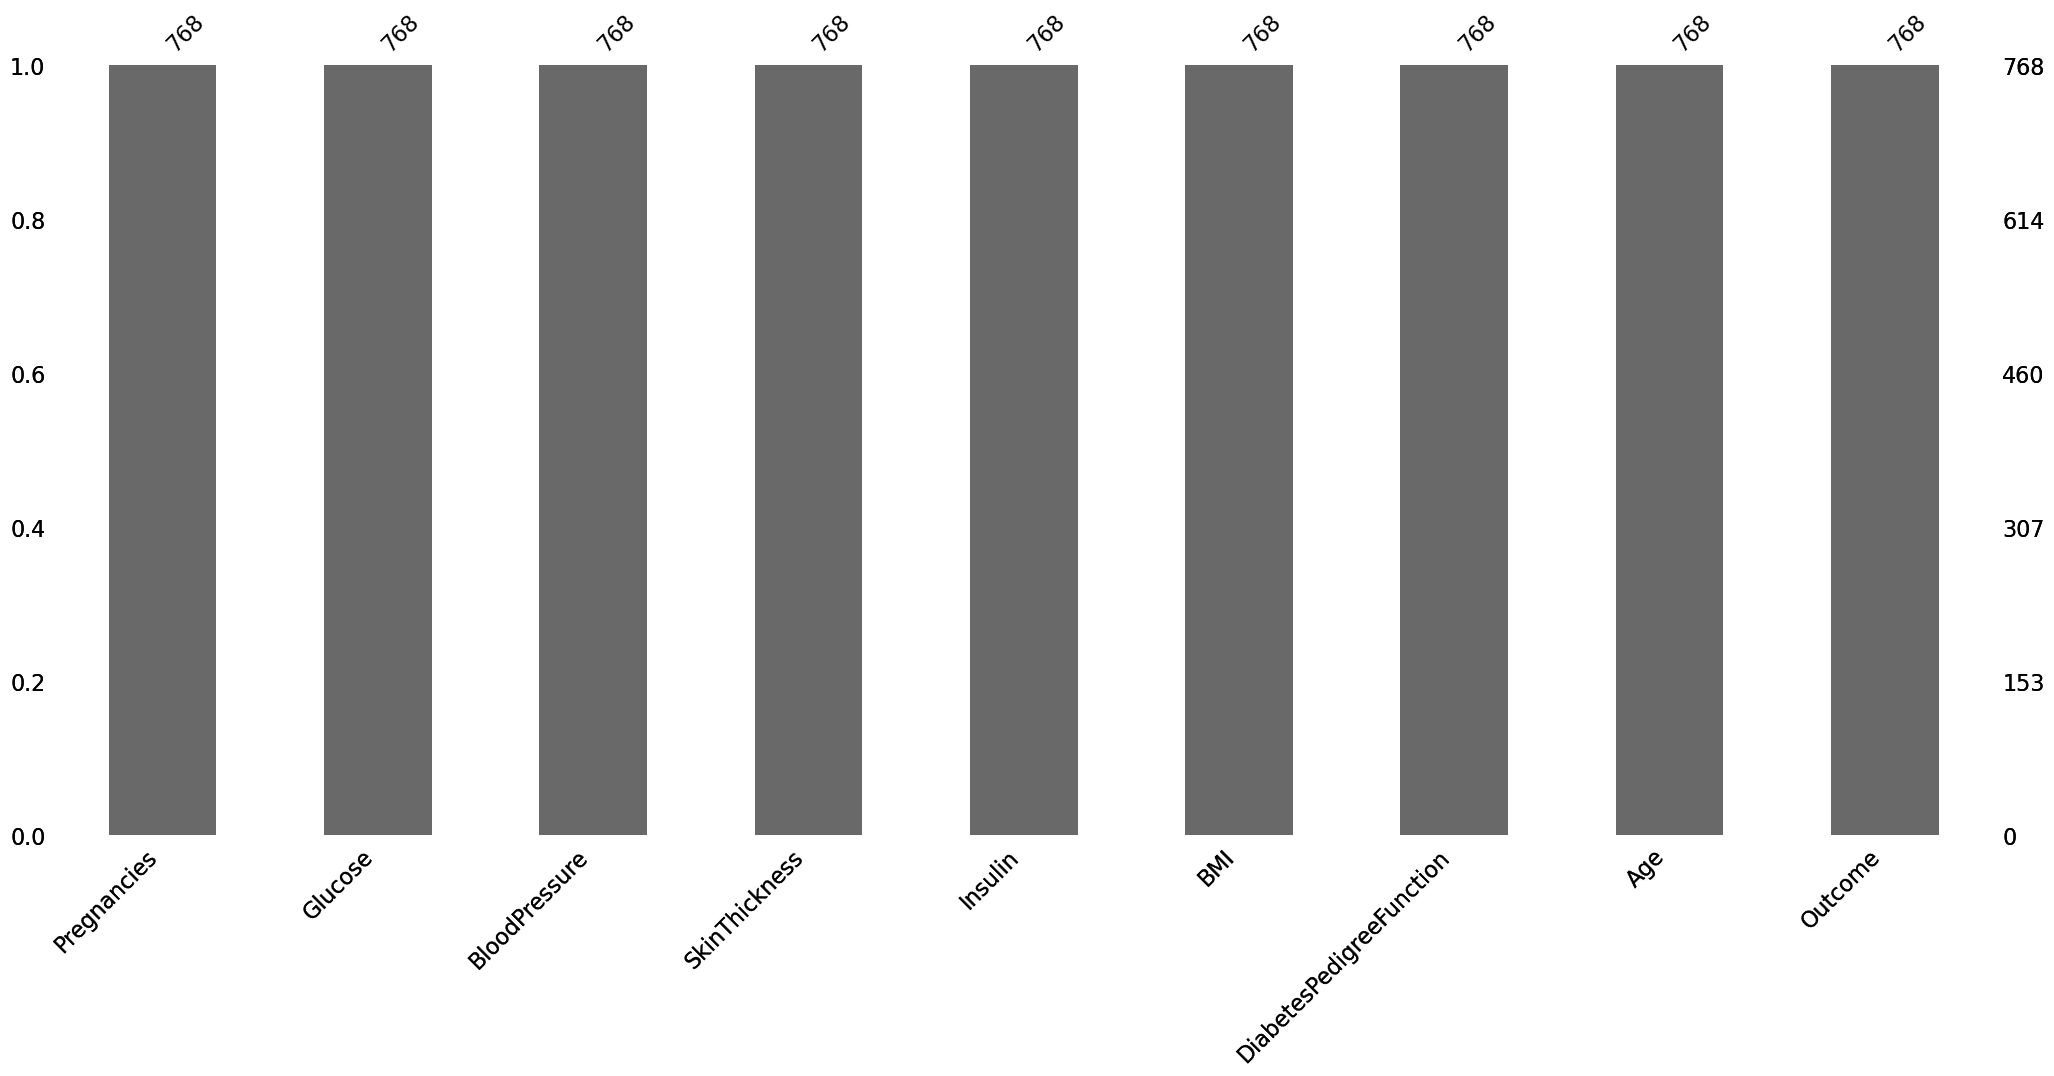

In [17]:
# Plotting null count analysis plot
import missingno as msno
plot = msno.bar(df_copy)

Outcome
0    500
1    268
Name: count, dtype: int64


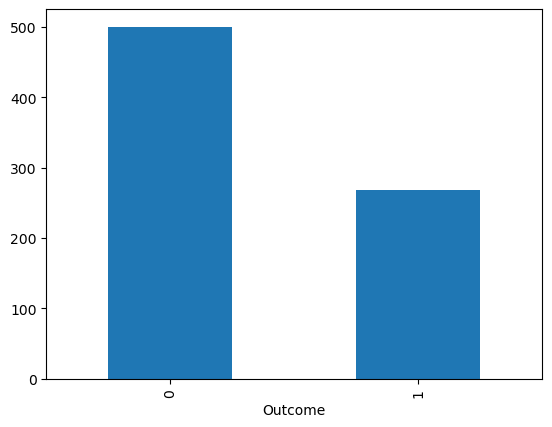

In [18]:
# Checking the balance of the data by plotting the count of outcomes by their values
color_wheel = {1: "0392cf", 2: "#7bc043"}
colors = df_copy["Outcome"].map(lambda x: color_wheel.get(x+1))
print(df_copy.Outcome.value_counts())
plot = df_copy.Outcome.value_counts().plot(kind = "bar")

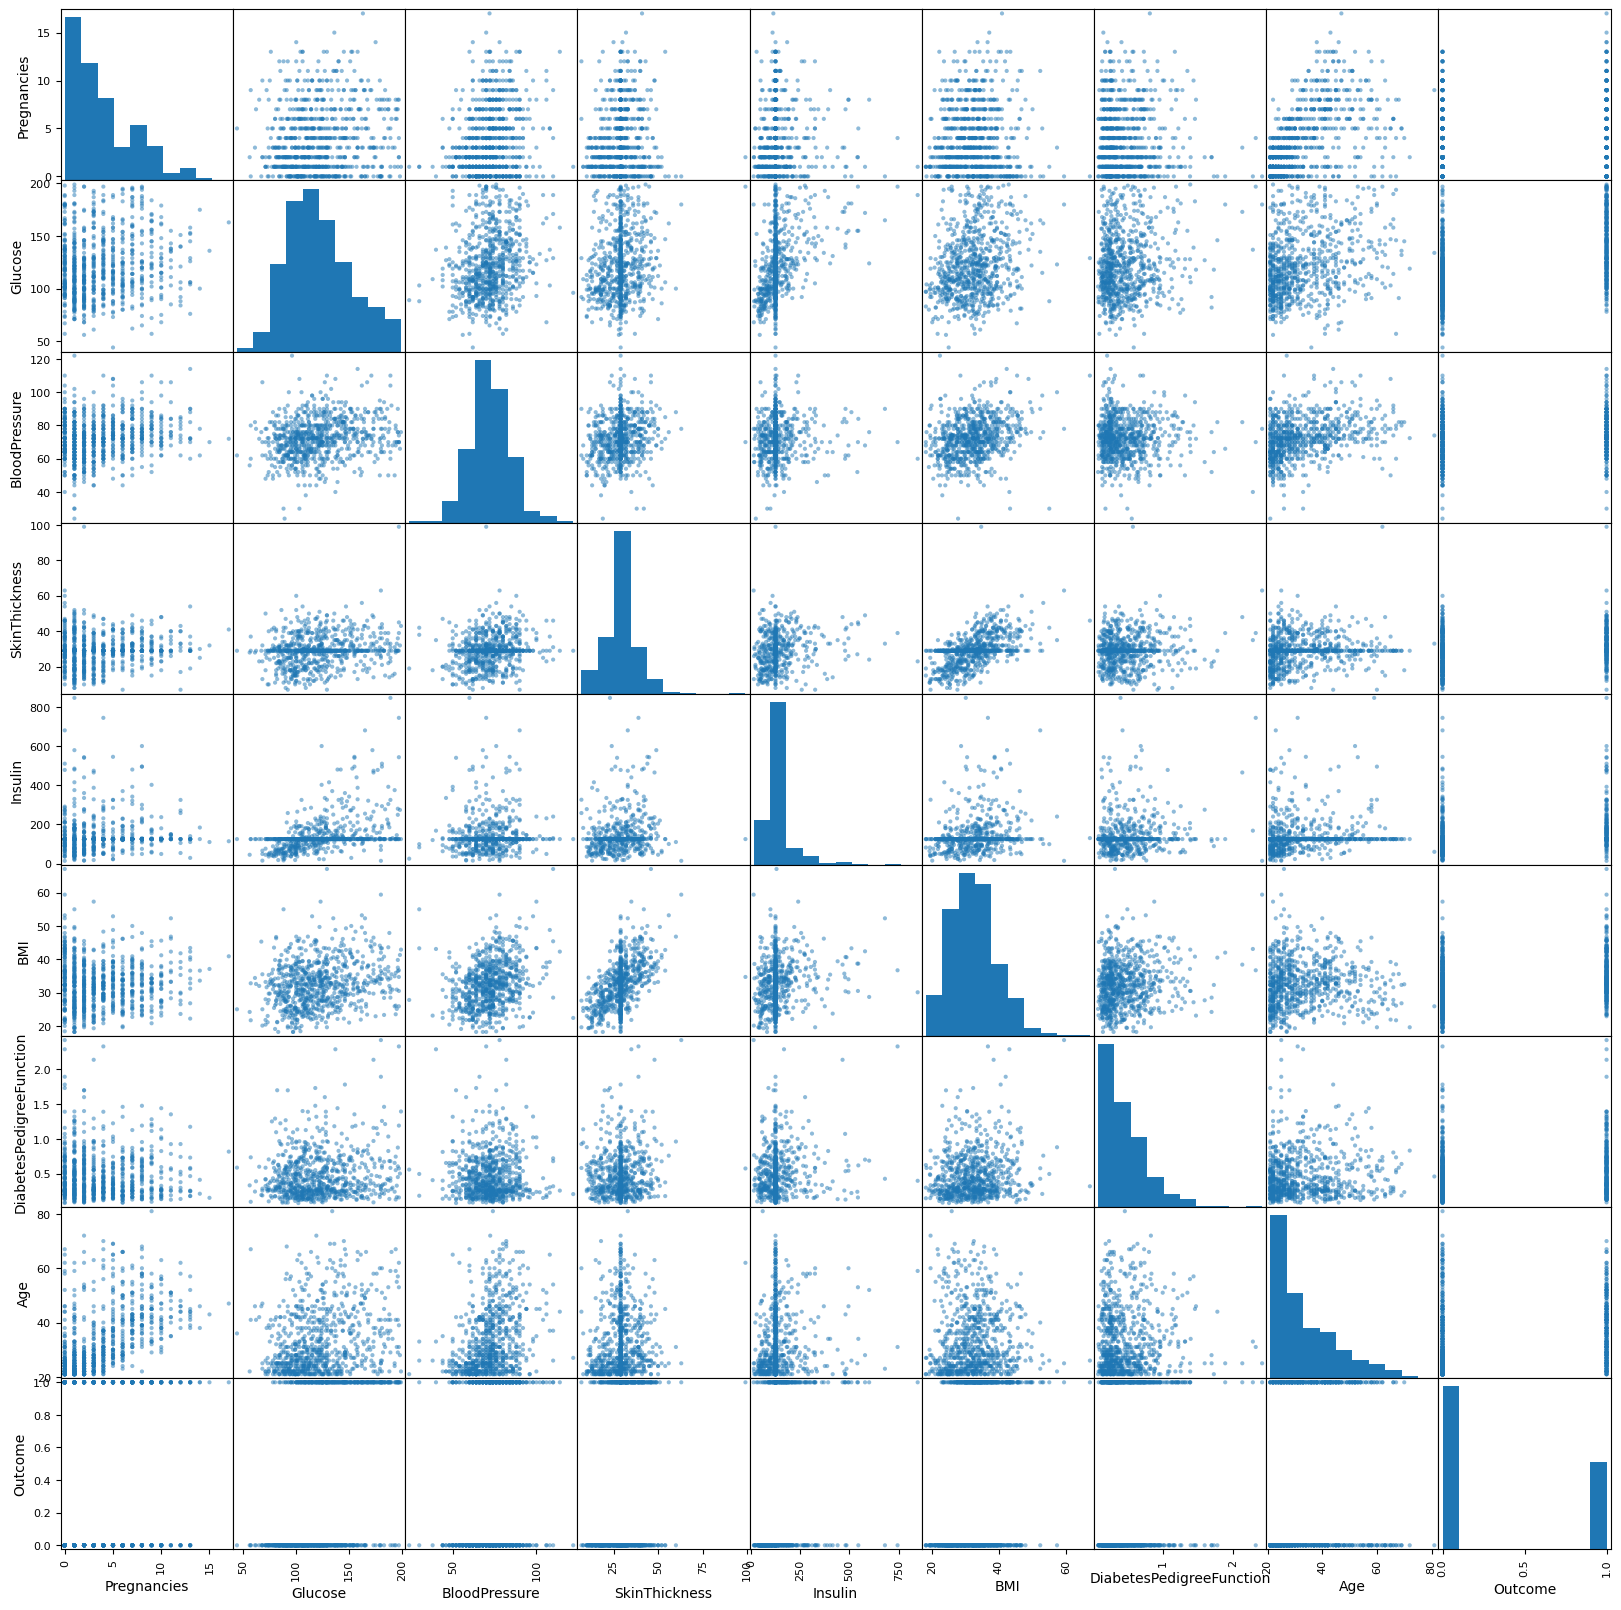

In [19]:
# Scatter matrix
from pandas.plotting import scatter_matrix
plot = scatter_matrix(df_copy, figsize = (20,20))

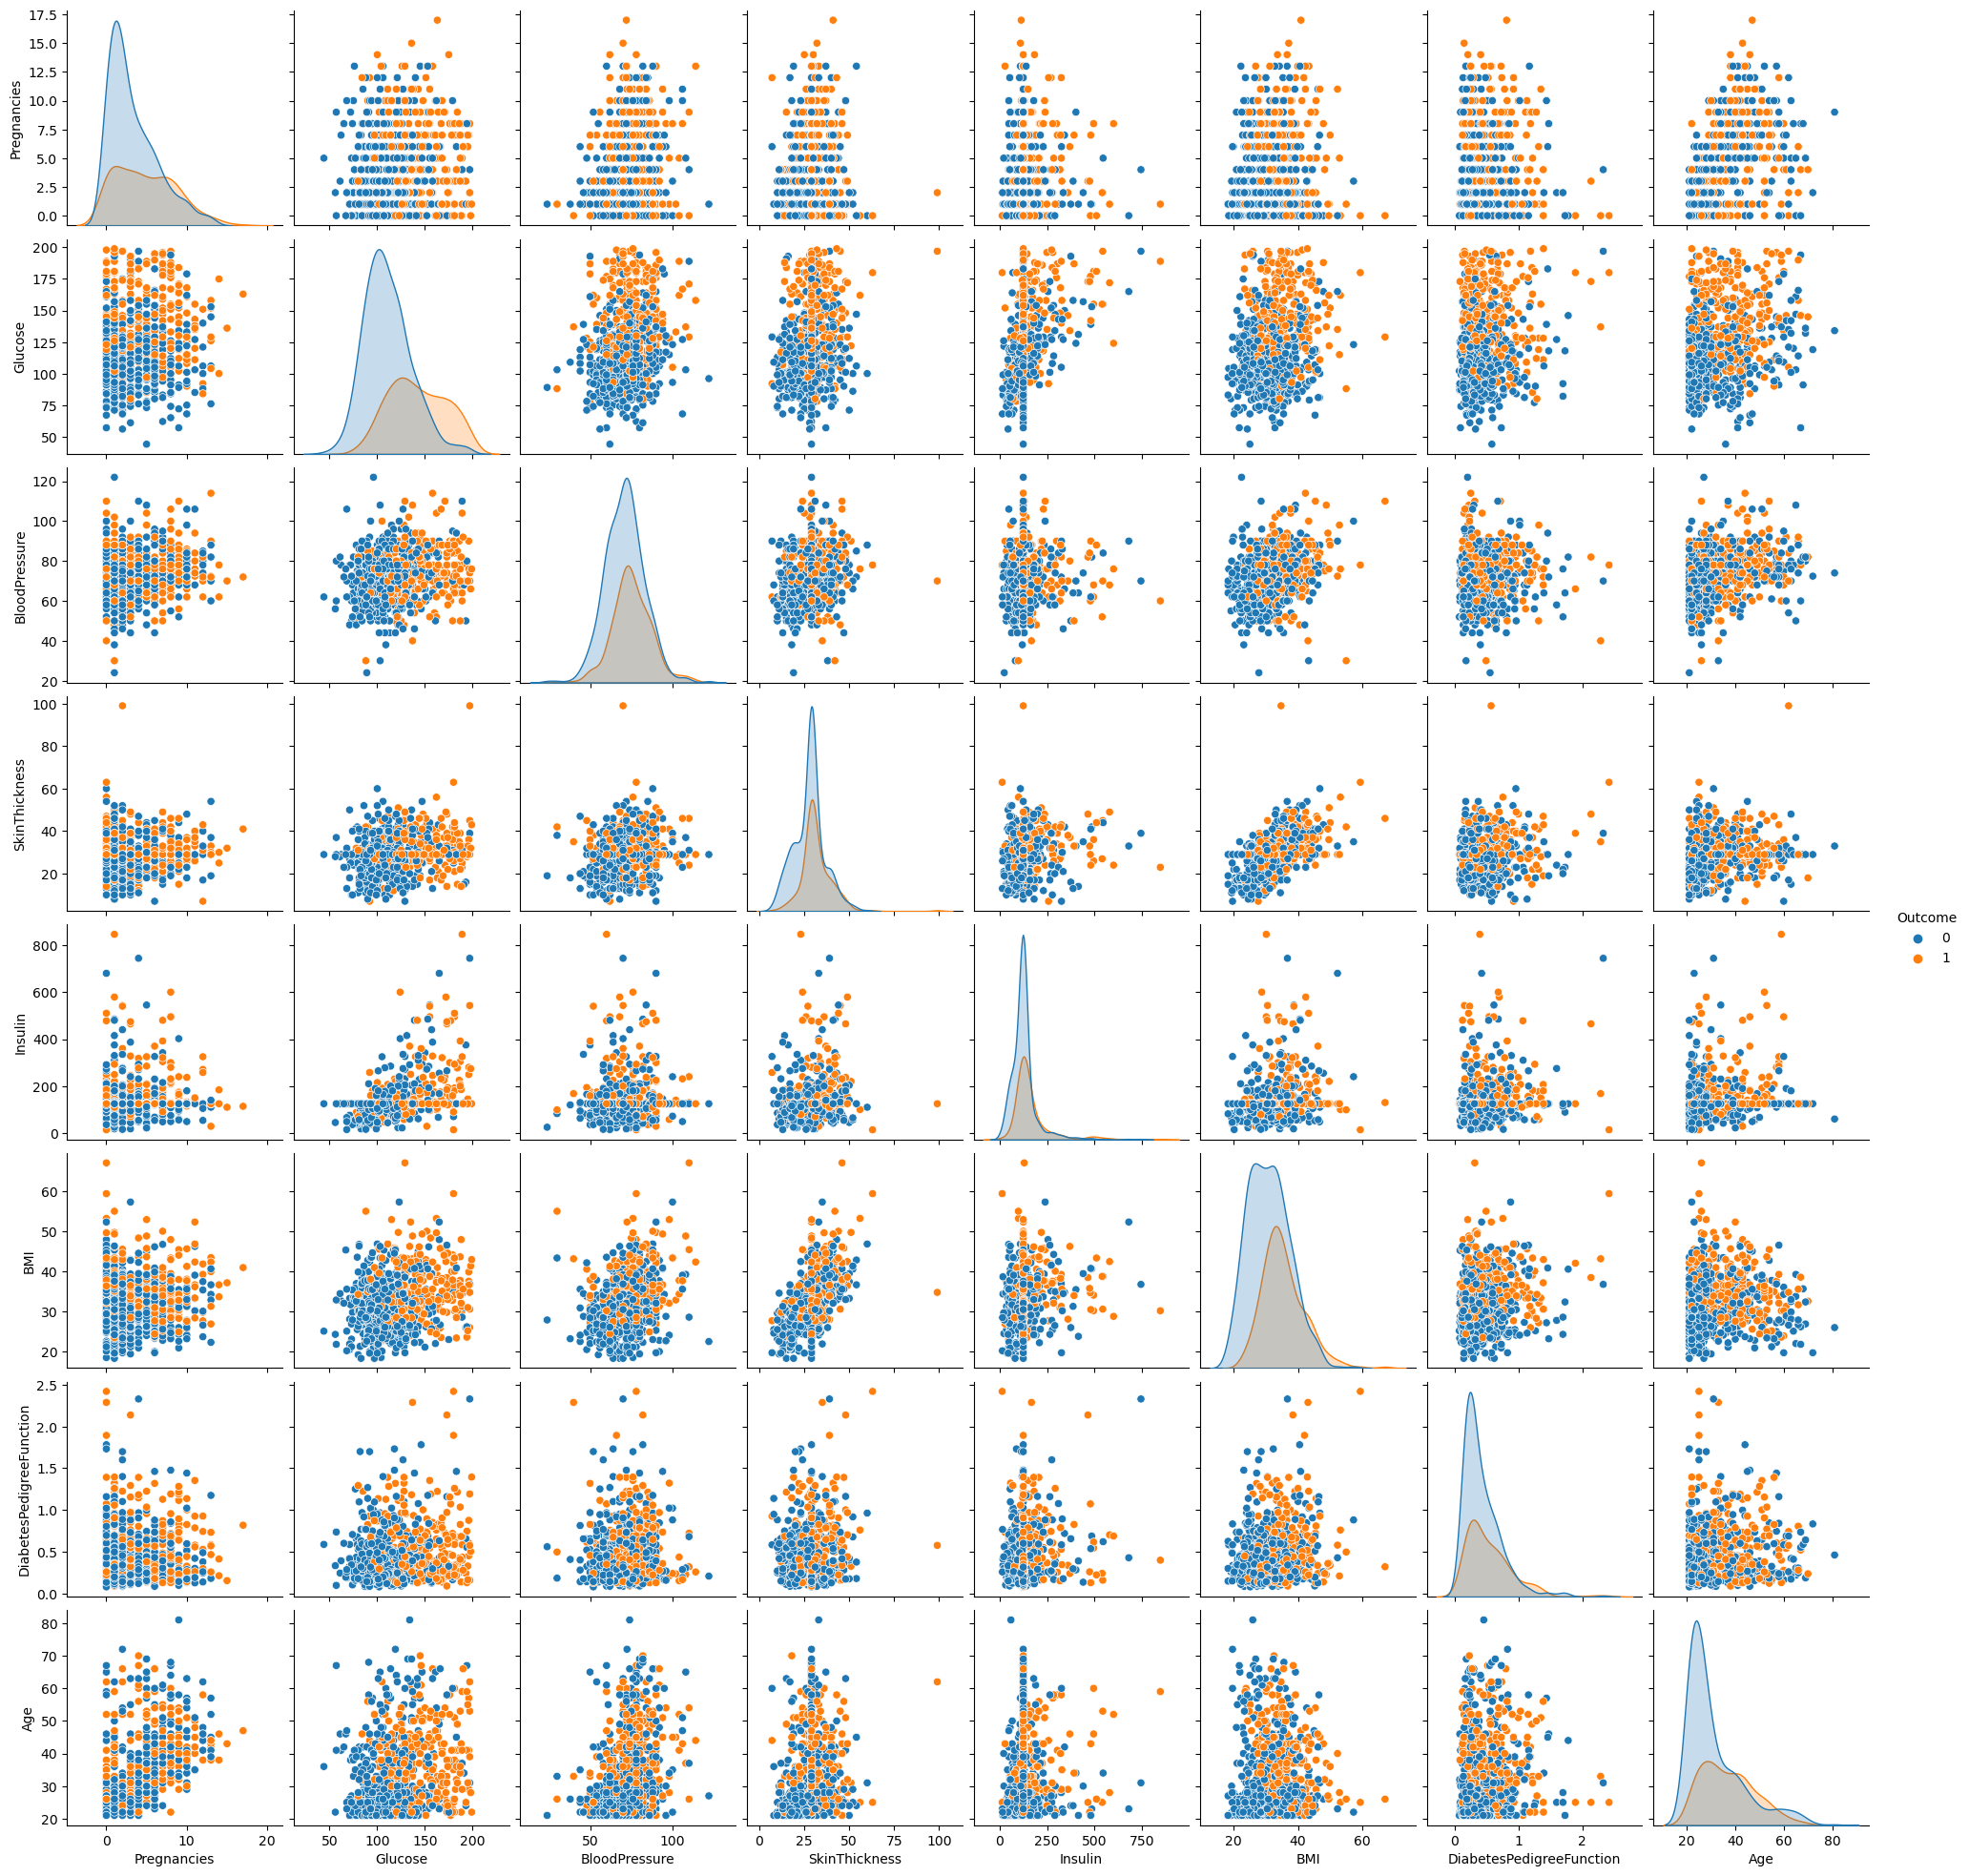

In [20]:
# Plotting the pairplots for the data
p = sns.pairplot(df_copy, hue = 'Outcome')

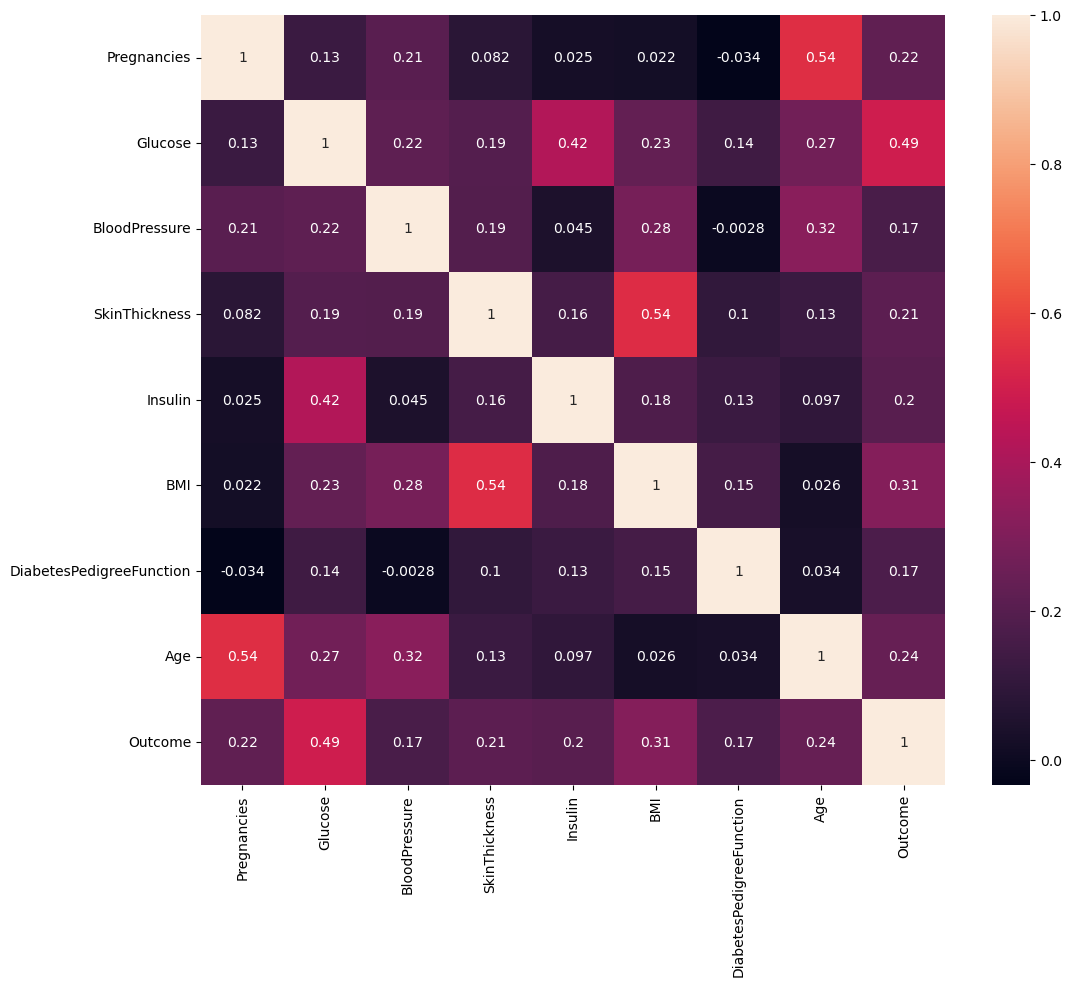

In [21]:
# Correlation between all the features
plt.figure(figsize = (12, 10))
plot = sns.heatmap(df_copy.corr(), annot = True)

In [22]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


## Scaling the data

In [23]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(df_copy)

In [24]:
dataset_scaled = pd.DataFrame(dataset_scaled)

In [25]:
# Selecting features = [Glucose, Insulin, BMI, Age]
X = dataset_scaled.iloc[:, [1, 4, 5, 7]].values
Y = dataset_scaled.iloc[:, 8].values

In [26]:
# Splitting X and Y
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state=42, stratify=Y)

## Model Building

In [28]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []

for i in range(1,15):
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, Y_train)

    train_scores.append(knn.score(X_train, Y_train))
    test_scores.append(knn.score(X_test, Y_test))

In [29]:
train_scores

[1.0,
 0.8420195439739414,
 0.8485342019543974,
 0.8257328990228013,
 0.8289902280130294,
 0.8110749185667753,
 0.8061889250814332,
 0.8029315960912052,
 0.8143322475570033,
 0.8045602605863192,
 0.8045602605863192,
 0.8029315960912052,
 0.8029315960912052,
 0.8078175895765473]

In [30]:
test_scores

[0.7012987012987013,
 0.7207792207792207,
 0.7467532467532467,
 0.7142857142857143,
 0.7272727272727273,
 0.7077922077922078,
 0.7467532467532467,
 0.7272727272727273,
 0.7402597402597403,
 0.7272727272727273,
 0.7532467532467533,
 0.7532467532467533,
 0.7662337662337663,
 0.7792207792207793]

In [31]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print("Max train score {} % and k = {}".format(max_train_score*100,list(map(lambda x : x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [32]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print("Max test score {} % and k = {}".format(max_test_score*100,list(map(lambda x : x+1, test_scores_ind))))

Max test score 77.92207792207793 % and k = [14]


In [33]:
knn = KNeighborsClassifier(14)
knn.fit(X_train, Y_train)
knn.score(X_test, Y_test)

0.7792207792207793

## Confusion Matrix

Text(0.5, 23.52222222222222, 'Predicted label')

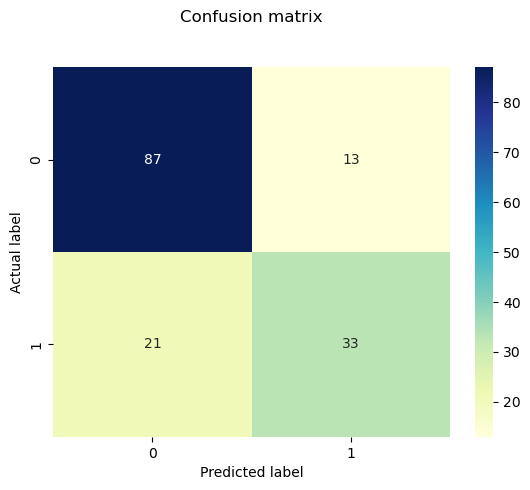

In [34]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
con_matrix = metrics.confusion_matrix(Y_test, y_pred)
p = sns.heatmap(pd.DataFrame(con_matrix), annot = True, cmap = "YlGnBu", fmt = 'g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## True Positive : 87

## False Positive : 13

## False Negative : 21

## True Negative : 33

In [35]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.87      0.84       100
         1.0       0.72      0.61      0.66        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



## ROC-AUC Curve

AUC stands for area under the ROC curve i.e. AUC measures the entire two-dimensional area underneath the entire ROC curve. The area under the AUC is the measure of the ability of a classifier to distinguish between classes. The ROC curve shows the trade-off between sensitivity or true positive rate and specificity or false positive rate.

In [36]:
from sklearn.metrics import roc_curve
y_pred_prob = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_prob)

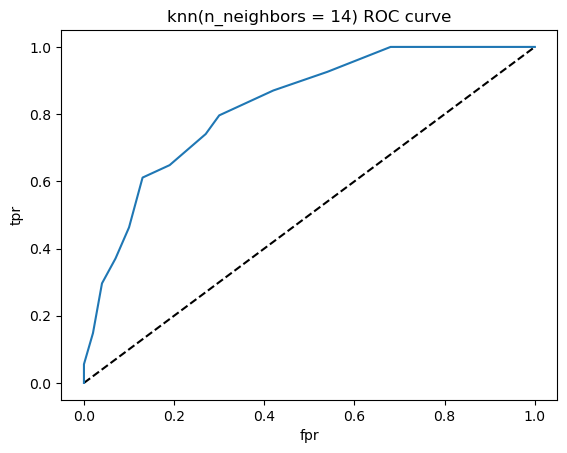

In [37]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label = 'knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('knn(n_neighbors = 14) ROC curve')
plt.show()

The higher the area under the curve means the better the model performance it can accurately predict the patients have diabetes or don't have diabetes.

In [38]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, y_pred_prob)

0.8240740740740741

## GridSearchCV

It helps to loop through predefined hyper parameters and fit our model on our training set.

In [39]:
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv = 5)
knn_cv.fit(X, Y)

print("Best Score:" + str(knn_cv.best_score_))
print("Beat Parameters:" + str(knn_cv.best_params_))

Best Score:0.7852304558186911
Beat Parameters:{'n_neighbors': 21}
